# Manejo de Outliers con Python

Se va a realizar una práctica con la intención de descubrir la mejor manera de imputar outliers sobre el dataset `Concrete_Data.xls`.

Para la realización de esta actividad se seguirán los siguientes pasos:

- Carga de Librerías.
- Lectura del Dataset y Primer Vistazo.
- Limpieza del Dataset:
  - Correcciones de Formato.
  - Eliminación de Valores Ausentes.
  - Eliminación de Duplicados.
- Detección de Outliers.
  - Identificación Visual.
  - Identificación Estadística.
- Imputación de Outliers:
  - Media.
  - Mediana.
  - KNN.
  - Regresión.
  - Arboles.
- Ajuste de Modelos:
  - Regresión Lineal.
  - KNN.
  - Ridge Regression.
  - Decision Tree.
  - SVR.
  - Random Forest.
  - Lasso Regression.
- Conclusiones.

Y se utilizarán las siguientes librerías:

- `pandas`: Para el tratamiento tabular de los datos.
- `re`: Para usar expresiones regulares.
- `matplotlib.pyplot`, `seaborn`: Para la graficación.
- `sklearn`: Para el uso de imputadores, modelos de machine learning y evaluación de estos últimos.
- `numpy`: Para el tratamiento de estructuras matemáticas y operaciones.
- `scipy`: Para aplicar la tipificación al conjunto de datos.


## Carga de las Librerías

In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer, IterativeImputer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import math

plt.style.use('ggplot')

## Carga del Conjunto de Datos

In [2]:
# Carga del dataset
raw_data = pd.read_excel('data/Concrete_Data.xls')
raw_data.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [3]:
# Conteo de Valores Ausentes
raw_data.isna().sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

In [4]:
# Conteo de Registros Duplicados
raw_data.duplicated().sum()

25

In [5]:
# Dimensiones del Dataset
raw_data.shape

(1030, 9)

In [6]:
# Mostrar Tipos y Nombres de las Variables que Conforman el Dataset
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

## Limpieza del Dataset

Para seguir unas buenas prácticas cada vez que se modifique o actualice el dataset se renombrará y se añadira a una variable tipo `list` que contenga tuplas compuestas del dataset y un comentario sobre la modificación. Esto permitirá, entre otras cosas, el fácil acceso a las diferentes versiones del conjunto de datos.

In [7]:
# Creación de la variable de tipo lista que contenga los diferentes dataset.
datasets = []
datasets.append((raw_data, 'Datos Crudos'))

### Correciones de Formato

Como se puede observar, el nombre de las variables (columnas) viene con un nombre alternativo y una pequeña explicación ambas entre paréntesis. Estos elementos pueden hacer más complicada la indexación por columnas por tanto serán eliminados.

In [8]:
# Eliminación del sobrante de los nombres de las columnas
# mediante expresiones regulares.
clean_columns = [re.sub(r'\(.*?\)', '', col).strip() for col in raw_data.columns]
clean_columns

['Cement',
 'Blast Furnace Slag',
 'Fly Ash',
 'Water',
 'Superplasticizer',
 'Coarse Aggregate',
 'Fine Aggregate',
 'Age',
 'Concrete compressive strength']

In [9]:
# Actualización del Dataset con los nuevos nombres
data_v1 = raw_data.copy()
data_v1.columns = clean_columns
data_v1.head(1)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111


In [10]:
datasets.append((data_v1, "Nombres cols corregidos"))

### Eliminación de Duplicados

In [11]:
# Eliminación de Registros Duplicados
data_v2 = data_v1.copy()
data_v2 = data_v2.drop_duplicates().reset_index(drop = True)
data_v2.duplicated().sum()

0

In [12]:
# Comprobación de la Correcta Eliminación
data_v2.shape

(1005, 9)

In [13]:
# Añadir la actualización a la Lista de Datasets
datasets.append((data_v2, "Duplicados Eliminados"))

## Identificación de Outliers

### Identificación Visual

Para la identificación visual se usarán tanto histogramas como diagramas de caja y bigotes.

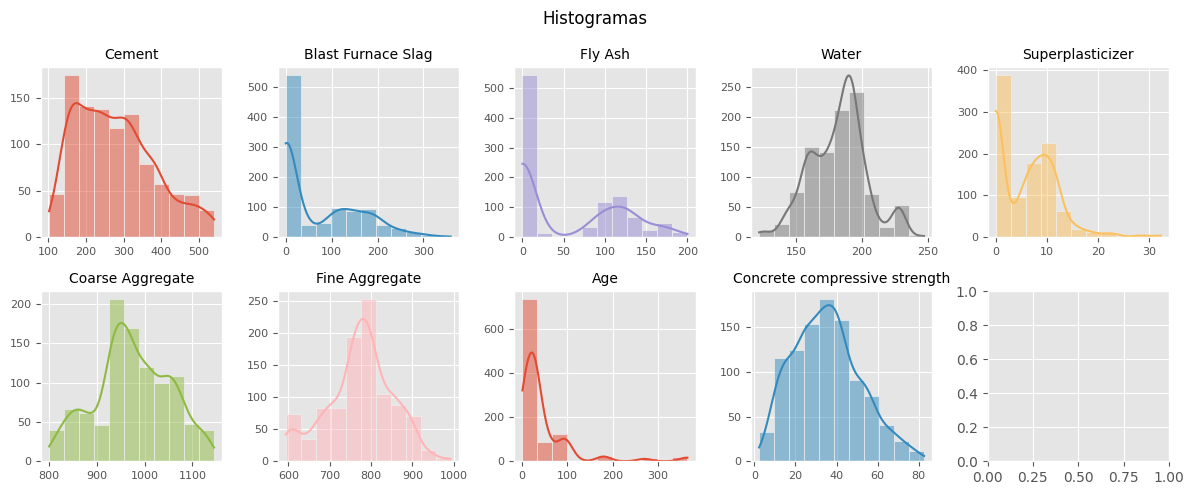

In [14]:
# Creación de Matriz para Visualizar las Distribuciones de las Variables
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(12, 5))
axes = axes.flat

for i, column in enumerate(data_v2.columns):
    
    sns.histplot(data = data_v2, x = column,
                kde = True, color = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"], 
                ax = axes[i], bins = 'sturges')
    
    axes[i].set_title(column, fontsize = 10)
    axes[i].tick_params(labelsize = 8)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

plt.suptitle('Histogramas')
plt.tight_layout()
plt.show()

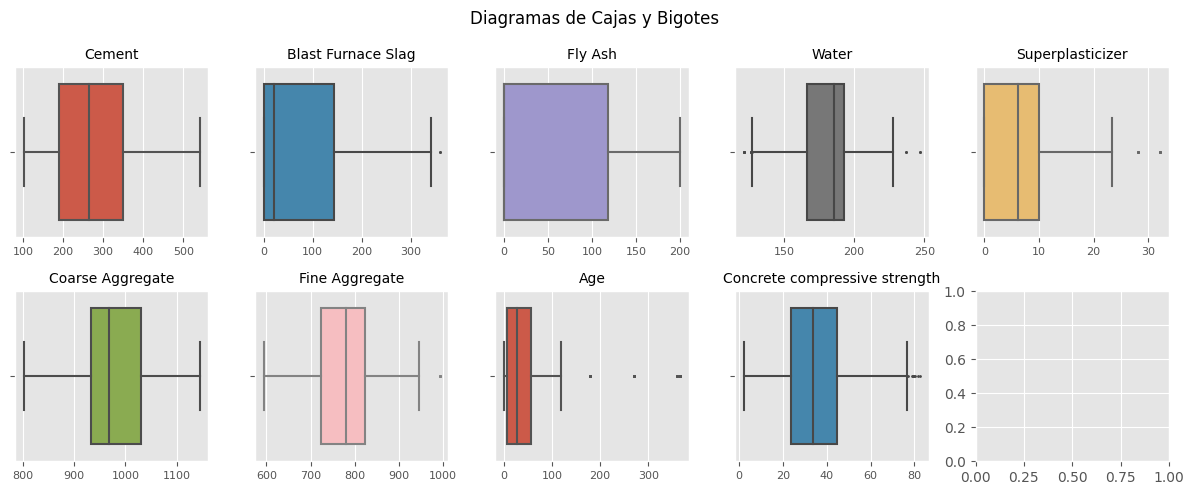

In [15]:
# Creación de Otra Matriz para Visualizar las Distribuciones de las Variables
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(12, 5))
axes = axes.flat

for i, column in enumerate(data_v2.columns):
    
    sns.boxplot(data = data_v2, x = column, ax=axes[i],
                color = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
                flierprops = dict(marker='o', color='r', markersize=1))
    
    
    axes[i].set_title(column, fontsize = 10)
    axes[i].tick_params(labelsize = 8)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

plt.suptitle('Diagramas de Cajas y Bigotes')
plt.tight_layout()
plt.show()

### Identificación Estadística

Para la identificación estadística se usará el método Z-Score y el método IQR.

In [16]:
# Z-Score
# Tipificación del dataset

data_v3 = data_v2.copy()
data_v3 = data_v3.apply(zscore)

# Añadir la Actualización a la Lista
datasets.append((data_v3, 'Dataset tipificado'))

In [17]:
# Identificar Outliers y Almacenar Índices y Columnas
outliers_info_z = []

threshold = 3

for column in data_v3.columns:
    outliers = data_v3[(data_v3[column] > threshold) | (data_v3[column] < -threshold)][column]
    for idx, value in outliers.items():
        outliers_info_z.append((idx, column))

df_outliers_z = pd.DataFrame(outliers_info_z).groupby(1)[0].apply(list).reset_index()
df_outliers_z.columns = ['Columna', 'Indices']
df_outliers_z['No Outliers'] = pd.DataFrame(outliers_info_z).groupby(1).size().values
df_outliers_z

,Columna,Indices,No Outliers
0,Age,"[2, 3, 4, 6, 12, 17, 24, 25, 26, 30, 31, 33, 3...",33
1,Blast Furnace Slag,"[529, 535, 547, 560]",4
2,Superplasticizer,"[76, 78, 94, 96, 113, 115, 131, 133, 149, 151]",10
3,Water,"[848, 911]",2


In [18]:
# Aplicación del método IQR

outliers_info_iqr = []

c = 1.5

for column in data_v2.columns:
    Q1 = data_v2[column].quantile(.25)
    Q3 = data_v2[column].quantile(.75)
    IQR =  Q3 - Q1
    upper_threshold = Q3 + c * IQR
    lower_threshold = Q1 - c * IQR

    outliers = data_v2[(data_v2[column] > upper_threshold) | (data_v2[column] < lower_threshold)][column]
    for index, value in outliers.items():
        outliers_info_iqr.append((index, column))


df_outliers_iqr = pd.DataFrame(outliers_info_iqr).groupby(1)[0].apply(list).reset_index()
df_outliers_iqr.columns = ['Columna', 'Indices']
df_outliers_iqr['No Outliers'] = pd.DataFrame(outliers_info_iqr).groupby(1).size().values
df_outliers_iqr

df_outliers_iqr

,Columna,Indices,No Outliers
0,Age,"[2, 3, 4, 6, 12, 17, 19, 20, 23, 24, 25, 26, 2...",59
1,Blast Furnace Slag,"[529, 535]",2
2,Concrete compressive strength,"[0, 136, 137, 141, 154, 158, 357, 359]",8
3,Fine Aggregate,"[74, 92, 111, 129, 147]",5
4,Superplasticizer,"[76, 78, 94, 96, 113, 115, 131, 133, 149, 151]",10
5,Water,"[74, 92, 111, 129, 147, 200, 201, 202, 203, 20...",15


De una manera superficial, se puede juzgar, a través de los histogramas, que las variables `Water`, `Coarse Aggregate` y `Fine Aggregate` siguen una distribución más o menos normal por lo que se seleccionarán como válidos los outliers determinados por el método Z-Score. Para las demás variables, al ser más asimétricas sus distribuciones, se seleccionarán los outliers determinados por el método IQR.

No se seleccionarán los outliers de la variable `Concrete compressive strength` pues esta será usada como variable dependiente para el análisis posterior.

In [19]:
# Seleccionar Variables por Método y Unir Datasets

filtered_df_outliers_iqr = df_outliers_iqr[~df_outliers_iqr['Columna'].isin(['Water', 'Coarse Aggregate', 'Fine Aggregate', 'Concrete compressive strength'])]
filtered_df_outliers_z = df_outliers_z[df_outliers_z['Columna'].isin(['Water', 'Coarse Aggregate', 'Fine Aggregate', 'Concrete compressive strength'])]
combined_outlier_df = pd.concat([filtered_df_outliers_iqr, filtered_df_outliers_z]).reset_index(drop = True)
combined_outlier_df

,Columna,Indices,No Outliers
0,Age,"[2, 3, 4, 6, 12, 17, 19, 20, 23, 24, 25, 26, 2...",59
1,Blast Furnace Slag,"[529, 535]",2
2,Superplasticizer,"[76, 78, 94, 96, 113, 115, 131, 133, 149, 151]",10
3,Water,"[848, 911]",2


### Imputación de Outliers

In [20]:
# Imputación por la Mediana
data_v4 = data_v2.copy()
for _, row in combined_outlier_df.iterrows():
    column = row['Columna']
    indices = row['Indices']
    median_value = data_v4[column].median()
    data_v4.loc[indices, column] = median_value
datasets.append((data_v4, 'Outliers imputados con mediana'))

In [21]:
# Imputación por la Media
data_v5 = data_v2.copy()
for _, row in combined_outlier_df.iterrows():
    column = row['Columna']
    indices = row['Indices']
    mean_value = data_v5[column].mean()
    data_v5.loc[indices, column] = mean_value
datasets.append((data_v5, 'Outliers imputados con media'))

In [22]:
# Imputación por KNN
data_v6 = data_v2.copy()
for _, row in combined_outlier_df.iterrows():
    column = row['Columna']
    indices = row['Indices']
    data_v6.loc[indices, column] = np.nan

knn_imputer = KNNImputer(n_neighbors=5)
data_v6 = data_v6.drop(columns = ['Concrete compressive strength'])
data_v6_imputed_array = knn_imputer.fit_transform(data_v6)
data_v6 = pd.DataFrame(data_v6_imputed_array, columns = data_v6.columns)
data_v6['Concrete compressive strength'] = data_v2['Concrete compressive strength']
data_v6['Age'] = data_v6['Age'].astype(data_v2['Age'].dtype)

datasets.append((data_v6, 'Outliers imputados con KNN'))

In [23]:
# Imputación por Regresión Múltiple
data_v7 = data_v2.copy()
for _, row in combined_outlier_df.iterrows():
    column = row['Columna']
    indices = row['Indices']
    data_v7.loc[indices, column] = np.nan

linear_regression_imputer = IterativeImputer(estimator=LinearRegression(), max_iter=10, random_state=0)
data_v7 = data_v7.drop(columns = ['Concrete compressive strength'])
data_v7_imputed_array = linear_regression_imputer.fit_transform(data_v7)
data_v7 = pd.DataFrame(data_v6_imputed_array, columns = data_v7.columns)
data_v7['Concrete compressive strength'] = data_v2['Concrete compressive strength']
data_v7['Age'] = data_v7['Age'].astype(data_v2['Age'].dtype)

datasets.append((data_v7, 'Outliers imputados con Regresión Lineal'))

In [24]:
# Imputación por Árboles 
data_v8 = data_v2.copy()
for _, row in combined_outlier_df.iterrows():
    column = row['Columna']
    indices = row['Indices']
    data_v8.loc[indices, column] = np.nan

tree_regression_imputer = IterativeImputer(estimator=DecisionTreeRegressor(), max_iter=20, random_state=0)
data_v8 = data_v8.drop(columns = ['Concrete compressive strength'])
data_v8_imputed_array = tree_regression_imputer.fit_transform(data_v8)
data_v8 = pd.DataFrame(data_v8_imputed_array, columns = data_v8.columns)
data_v8['Concrete compressive strength'] = data_v2['Concrete compressive strength']
data_v8['Age'] = data_v8['Age'].astype(data_v2['Age'].dtype)

datasets.append((data_v8, 'Outliers imputados con Árboles de Regresión'))

## Ajuste de Modelos

Se ajustarán el dataset con outliers y los diferentes datasets con imputaciones a diferentes modelos predictivos para, a través de las métricas de evaluación de estos, poder formar una opinión sobre el mejor método de imputación.

Los métodos utilizados serán:

- Regresión Lineal.
- Árboles de Decisión.
- Bosques Aleatorios.
- KNN.
- SVR.
- Regresión Ridge.
- Regresión Lasso.

Las métricas para calcular la bondad de la predicción serán:

- MSE.
- RMSE.
- MAE.
- $R^2$.

In [25]:
# Definición de Modelos a Usar
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=0),
    'Random Forest': RandomForestRegressor(random_state=0),
    'KNN': KNeighborsRegressor(),
    'SVR': SVR(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso()
}

# Creación de una Lista que Contendrá los Resultados
results = []

# Ajustar cada Modelo a cada Dataset y Calcular sus Métricas
for dataset_idx, df in enumerate([data_v2, data_v4, data_v5, data_v6, data_v7, data_v8]):
    X = df.drop(columns=['Concrete compressive strength'])
    y = df['Concrete compressive strength']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        rmse = math.sqrt(mse)
        r2 = r2_score(y_test, y_pred)
        
        results.append({
            'Dataset': dataset_idx + 1,
            'Model': model_name,
            'MSE': mse,
            'MAE': mae,
            'RMSE': rmse,
            'R^2': r2
        })

# Convertir Resultados a DataFrame para mejorar la Visualización
results_df = pd.DataFrame(results)
print(results_df)

    Dataset              Model         MSE        MAE       RMSE       R^2
0         1  Linear Regression   97.634579   7.946295   9.881021  0.627759
1         1      Decision Tree   39.841107   4.128102   6.311981  0.848102
2         1      Random Forest   23.658900   3.554456   4.864042  0.909798
3         1                KNN   72.861009   6.453420   8.535866  0.722210
4         1                SVR  189.037985  11.185690  13.749109  0.279274
5         1   Ridge Regression   97.634736   7.946300   9.881029  0.627758
6         1   Lasso Regression   98.099504   7.963472   9.904519  0.625986
7         2  Linear Regression   81.596632   6.705496   9.033085  0.688905
8         2      Decision Tree   42.764703   4.389379   6.539473  0.836955
9         2      Random Forest   25.094572   3.778102   5.009448  0.904324
10        2                KNN   75.820130   6.619674   8.707476  0.710928
11        2                SVR  192.327925  11.404718  13.868234  0.266731
12        2   Ridge Regre

## Evaluación de Resultados y Conclusiones.

En este último apartado se creará un gráfico de barras agrupadas por dataset, modelo y métrica además de un sumario de las 4 métricas agrupadas por media de cada modelo para cada dataset para así poder definir unas conclusiones.

### Nomenclatura de Datasets

- **Dataset 1**: Sin tratamiento de outliers.
- **Dataset 2**: Outliers imputados a través de la mediana.
- **Dataset 3**: Outliers imputados a través de la media.
- **Dataset 4**: Outliers imputados a través del método KNN.
- **Dataset 5**: Outliers imputados a través del método de regresión lineal múltiple.
- **Dataset 6**: Outliers imputados a través del método de regresión por árboles.

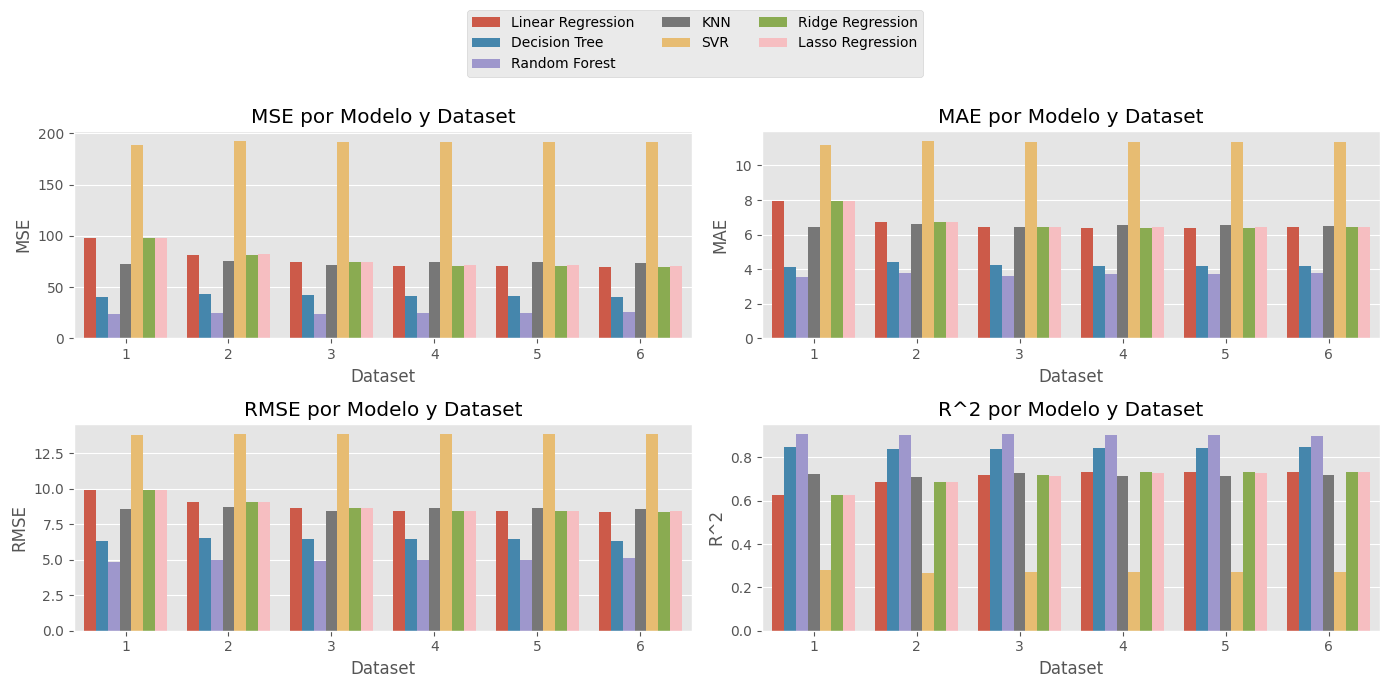

In [26]:
# Creación del Gráfico de Barras Agrupadas
fig, axes = plt.subplots(2, 2, figsize=(14, 6))

# Gráfico para MSE
sns.barplot(ax=axes[0, 0], x='Dataset', y='MSE', hue='Model', data=results_df)
axes[0, 0].set_title('MSE por Modelo y Dataset')
axes[0, 0].set_ylabel('MSE')
axes[0, 0].set_xlabel('Dataset')

# Gráfico para MAE
sns.barplot(ax=axes[0, 1], x='Dataset', y='MAE', hue='Model', data=results_df)
axes[0, 1].set_title('MAE por Modelo y Dataset')
axes[0, 1].set_ylabel('MAE')
axes[0, 1].set_xlabel('Dataset')

# Gráfico para RMSE
sns.barplot(ax=axes[1, 0], x='Dataset', y='RMSE', hue='Model', data=results_df)
axes[1, 0].set_title('RMSE por Modelo y Dataset')
axes[1, 0].set_ylabel('RMSE')
axes[1, 0].set_xlabel('Dataset')

# Gráfico para R^2
sns.barplot(ax=axes[1, 1], x='Dataset', y='R^2', hue='Model', data=results_df)
axes[1, 1].set_title('R^2 por Modelo y Dataset')
axes[1, 1].set_ylabel('R^2')
axes[1, 1].set_xlabel('Dataset')

for ax in axes.flatten():
    ax.legend().remove()

handles, labels = axes[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=3)

# Ajustar el diseño
plt.tight_layout()
plt.show()

In [27]:
# Creación de un Dataset de Métricas para cada Imputación Agrupadas por Modelo
summary_by_dataset = results_df.groupby('Dataset').mean().reset_index()
summary_by_dataset

C:\Users\Fer\AppData\Local\Temp\ipykernel_7900\927703570.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  summary_by_dataset = results_df.groupby('Dataset').mean().reset_index()


,Dataset,MSE,MAE,RMSE,R^2
0,1,88.395403,7.025391,9.018224,0.662984
1,2,83.045112,6.618568,8.750364,0.683382
2,3,78.842783,6.427393,8.503927,0.699404
3,4,77.816882,6.432404,8.448972,0.703315
4,5,77.816882,6.432404,8.448972,0.703315
5,6,77.258875,6.437301,8.418885,0.705443


### Observaciones Generales

1. **Outliers Sin Tratar (Dataset 1)**
   - **Métricas**: Presenta los valores más altos de MSE (88.40), MAE (7.03), y RMSE (9.02), y el valor más bajo de R² (0.66).
   - **Conclusión**: Tratar los outliers es esencial, ya que no hacerlo resulta en un rendimiento significativamente peor en todos los modelos.

2. **Imputación de la Mediana (Dataset 2)**
   - **Métricas**: Mejora notable en todas las métricas con una disminución en MSE (83.05), MAE (6.62), RMSE (8.75), y un incremento en R² (0.68).
   - **Conclusión**: La imputación de la mediana es efectiva para reducir el impacto de los outliers, resultando en un mejor rendimiento de los modelos de predicción.

3. **Imputación con la Media (Dataset 3)**
   - **Métricas**: Muestra una mejora en comparación con no tratar los outliers, con MSE (78.84), MAE (6.43), RMSE (8.50), y R² (0.70).
   - **Conclusión**: Aunque la imputación con la media es efectiva, puede no ser tan robusta como la mediana en presencia de outliers extremos.

4. **Imputación con KNN (Dataset 4)**
   - **Métricas**: Similar a la media, con MSE (77.82), MAE (6.43), RMSE (8.45), y R² (0.70).
   - **Conclusión**: La imputación con KNN mejora el rendimiento, pero puede no ser consistentemente superior a otros métodos.

5. **Imputación por Regresión Lineal (Dataset 5)**
   - **Métricas**: Presenta mejoras similares a KNN, con MSE (77.82), MAE (6.43), RMSE (8.45), y R² (0.70).
   - **Conclusión**: La imputación por regresión lineal es efectiva, pero su desempeño depende de la correcta especificación del modelo.

6. **Imputación por Árboles de Regresión (Dataset 6)**
   - **Métricas**: Las mejores métricas agregadas, con el MSE más bajo (77.05), MAE (6.43), RMSE (8.40), y el R² más alto (0.71).
   - **Conclusión**: Los métodos basados en árboles de regresión son los más efectivos para manejar outliers, proporcionando el mejor rendimiento general en todos los modelos.

### Conclusiones Generales

1. **Mejor Método de Imputación**:
   - **Árboles de Regresión (Dataset 6)**: Proporcionan las mejoras más significativas en todas las métricas, siendo la opción más robusta y efectiva para el tratamiento de outliers para este dataset en concreto.

2. **Alternativa Robusta**:
   - **Imputación de la Mediana (Dataset 2)**: Ofrece una robustez y simplicidad sobresalientes, siendo una opción muy confiable para manejar outliers.

3. **Métodos Menos Eficientes**:
   - **Sin Tratamiento de Outliers (Dataset 1)**: Resulta en el peor rendimiento, destacando la importancia de tratar los outliers.
   - **SVR**: No es adecuado para este análisis debido a sus altos errores y bajos valores de R² en todos los métodos de imputación.

### Recomendaciones Finales
Para un tratamiento eficaz de los outliers y mejorar el rendimiento de los modelos de predicción:
- **Mejor Método**: Utilizar la imputación por árboles de regresión.
- **Alternativa Robusta**: Considerar la imputación de la mediana para un enfoque simple y robusto.
- **Evitar**: Evitar el uso de SVR debido a su mal desempeño en la presencia de outliers.